<a href="https://colab.research.google.com/github/Meta-Sean/Course-6-Mono/blob/main/6_0002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction, Optimization Problems

In [ ]:
'''
Each item is represented by a pair, <value, weight>

The knapsack can accommodate items with a total weight of no more than w

A vector, L, of length n, represents the set of available items. Each element of the vector is an item

A vector, V, of length n, is used to indicate whether or not items are take. If V[i]=1, items I[i] is taken. If V[i] = 0, items I[i] is not taken

'''





'\nEach item is represented by a pair, <value, weight>\n\nThe knapsack can accommodate items with a total weight of no more than w\n\nA vector, L, of length n, represents the set of available items. Each element of the vector is an item\n\nA vector, V, of length n, is used to indicate whether or not items are take. If V[i]=1, items I[i] is taken. If V[i] = 0, items I[i] is not taken\n\n'

In [ ]:
# Greedy Algorithm Sudo 
# while knapsack not full 
  # put 'best' avaiblable item in knapsack

In [ ]:
class Food(object):
  def __init__(self, n, v, w):
    self.name = n
    self.value = v
    self.calories = w

  def getValue(self):
    return self.value

  def getCost(self):
    return self.calories

  def density(self):
    return self.getValue()/self.getCost()

  def __str__(self):
    return self.name + ": <" + str(self.value) + ", " + str(self.calories) + ">"

In [ ]:
def buildMenu(names, values, calories):
  menu = []
  for i in range(len(values)):
    menu.append(Food(names[i], values[i],calories[i]))

  return menu

In [ ]:
def greedy(items, maxCost, keyFunction):
  '''Assumes items a list, maxCost >= 0,
    keyFunction maps elements of items to numbers'''
  itemsCopy = sorted(items, key = keyFunction, reverse=True)
  result = []
  totalValue, totalCost = 0.0, 0.0

  for i in range(len(itemsCopy)):
    if (totalCost+itemsCopy[i].getCost()) <= maxCost:
      result.append(itemsCopy[i])
      totalCost += itemsCopy[i].getCost()
      totalValue += itemsCopy[i].getValue()

  return (result, totalValue)

In [ ]:
def testGreedy(items, constraint, keyFunction):
    taken, val = greedy(items, constraint, keyFunction)
    print('Total value of items taken =', val)
    for item in taken:
        print('   ', item)

In [ ]:
def testGreedys(foods, maxUnits):
    print('Use greedy by value to allocate', maxUnits,
          'calories')
    testGreedy(foods, maxUnits, Food.getValue)
    print('\nUse greedy by cost to allocate', maxUnits,
          'calories')
    testGreedy(foods, maxUnits,
               lambda x: 1/Food.getCost(x))
    print('\nUse greedy by density to allocate', maxUnits,
          'calories')
    testGreedy(foods, maxUnits, Food.density)

In [ ]:
names = ['wine', 'beer', 'pizza', 'burger', 'fries',
         'cola', 'apple', 'donut', 'cake']
values = [89,90,95,100,90,79,50,10]
calories = [123,154,258,354,365,150,95,195]
foods = buildMenu(names, values, calories)

In [ ]:
testGreedys(foods,800)

Use greedy by value to allocate 800 calories
Total value of items taken = 285.0
    burger: <100, 354>
    pizza: <95, 258>
    beer: <90, 154>

Use greedy by cost to allocate 800 calories
Total value of items taken = 318.0
    apple: <50, 95>
    wine: <89, 123>
    cola: <79, 150>
    beer: <90, 154>
    donut: <10, 195>

Use greedy by density to allocate 800 calories
Total value of items taken = 403.0
    wine: <89, 123>
    beer: <90, 154>
    cola: <79, 150>
    apple: <50, 95>
    pizza: <95, 258>


In [ ]:
testGreedys(foods,1000)

Use greedy by value to allocate 1000 calories
Total value of items taken = 424.0
    burger: <100, 354>
    pizza: <95, 258>
    beer: <90, 154>
    wine: <89, 123>
    apple: <50, 95>

Use greedy by cost to allocate 1000 calories
Total value of items taken = 413.0
    apple: <50, 95>
    wine: <89, 123>
    cola: <79, 150>
    beer: <90, 154>
    donut: <10, 195>
    pizza: <95, 258>

Use greedy by density to allocate 1000 calories
Total value of items taken = 413.0
    wine: <89, 123>
    beer: <90, 154>
    cola: <79, 150>
    apple: <50, 95>
    pizza: <95, 258>
    donut: <10, 195>


# Optimization Problems Lecture 2

In [ ]:
def maxVal(toConsider, avail):
  """Assumes toConsider a list of items,
 avail a weight
 Returns a tuple of the total value of a
 solution to 0/1 knapsack problem and
 the items of that solution"""

  if toConsider == [] or avail == 0:
    result = (0, ())
  elif toConsider[0].getCost() > avail:
    result = maxVal(toConsider[1:], avail)
  else:
    nextItem = toConsider[0]
    withVal, withToTake = maxVal(toConsider[1:], avail - nextItem.getCost())
    withVal += nextItem.getValue()
    withoutVal, withoutToTake = maxVal(toConsider[1:], avail)
    if withVal > withoutVal:
      result = (withVal, withToTake + (nextItem,))
    else:
        result = (withoutVal, withoutToTake)
  return result


def testMaxVal(foods, maxUnits, printItems = True):
  print('Use search tree to allocate', maxUnits, 'calories')
  val, taken = maxVal(foods, maxUnits)
  print('Total value of items taken =', val)
  if printItems:
    for item in taken:
      print('  ', item)

In [ ]:
names = ['wine', 'beer', 'pizza', 'burger', 'fries',
         'cola', 'apple', 'donut', 'cake']
values = [89,90,95,100,90,79,50,10]
calories = [123,154,258,354,365,150,95,195]
foods = buildMenu(names, values, calories)

In [ ]:
testGreedys(foods, 750)
print('')
testMaxVal(foods, 750)

Use greedy by value to allocate 750 calories
Total value of items taken = 284.0
    burger: <100, 354>
    pizza: <95, 258>
    wine: <89, 123>

Use greedy by cost to allocate 750 calories
Total value of items taken = 318.0
    apple: <50, 95>
    wine: <89, 123>
    cola: <79, 150>
    beer: <90, 154>
    donut: <10, 195>

Use greedy by density to allocate 750 calories
Total value of items taken = 318.0
    wine: <89, 123>
    beer: <90, 154>
    cola: <79, 150>
    apple: <50, 95>
    donut: <10, 195>

Use search tree to allocate 750 calories
Total value of items taken = 353
   cola: <79, 150>
   pizza: <95, 258>
   beer: <90, 154>
   wine: <89, 123>


In [ ]:
import random

def buildLargeMenu(numItems, maxVal, maxCost):
    items = []
    for i in range(numItems):
        items.append(Food(str(i),
                          random.randint(1, maxVal),
                          random.randint(1, maxCost)))
    return items

# for numItems in (5, 10, 15, 20, 25, 30, 35, 40, 45):
#     print('Try a menu with', numItems, 'items')
#     items = buildLargeMenu(numItems, 90, 250)
#     testMaxVal(items, 750, False)  

In [ ]:
def fib(n):
 if n == 0 or n == 1:
  return 1
 else:
  return fib(n - 1) + fib(n - 2) 

In [ ]:
# Using Memoization
def fastFib(n, memo = {}):
  """Assumes n is an int >= 0, memo used only by recursive calls
    Returns Fib of n """

  if n == 0 or n == 1:
    return 1
  try:
    return memo[n]
  except KeyError:
    result = fastFib(n-1, memo) + fastFib(n-2, memo)
    memo[n] = result
    return result

# Graph-theoretic Models

In [ ]:
"""
Created on Tue Jul 12 15:04:56 2016

@author: guttag, revised egrimson
"""

class Node(object):
    def __init__(self, name):
        """Assumes name is a string"""
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return self.name

class Edge(object):
    def __init__(self, src, dest):
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()
               
class Digraph(object):
    """edges is a dict mapping each node to a list of
    its children"""
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.edges
    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1] #omit final newline

In [ ]:
class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)
    
def buildCityGraph(graphType):
    g = graphType()
    for name in ('Boston', 'Providence', 'New York', 'Chicago',
                 'Denver', 'Phoenix', 'Los Angeles'): #Create 7 nodes
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('Providence')))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('Boston')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('New York'), g.getNode('Chicago')))
    g.addEdge(Edge(g.getNode('Chicago'), g.getNode('Denver')))
    g.addEdge(Edge(g.getNode('Chicago'), g.getNode('Phoenix')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('Phoenix')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Los Angeles'), g.getNode('Boston')))
    return g


def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result 

In [ ]:
def DFS(graph, start, end, path, shortest, toPrint = False):
  path = path + [start]
  if toPrint:
    print('Current DFS path:', printPath(path))
  if start == end:
    return path
  for node in graph.childrenOf(start):
    if node not in path: #avoid cycles
      if shortest == None or len(path) < len(shortest):
        newPath = DFS(graph, node, end, path, shortest, toPrint)
        if newPath != None:
          shortest = newPath
    elif toPrint:
      print('Already visited', node)
  return shortest

def shortestPath(graph, start, end, toPrint = False):
  return DFS(graph, start, end, [], None, toPrint)


In [ ]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)

def testSP(source, destination):
    g = buildCityGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

testSP('Chicago', 'Boston')
print()
#testSP('Boston', 'Phoenix')
#print()

Current DFS path: Chicago
Current DFS path: Chicago->Denver
Current DFS path: Chicago->Denver->Phoenix
Current DFS path: Chicago->Denver->New York
Already visited Chicago
Current DFS path: Chicago->Phoenix
There is no path from Chicago to Boston



In [ ]:
printQueue = True

def BFS(graph, start, end, toPrint = False):
  initPath = [start]
  pathQueue = [initPath]
  while len(pathQueue) != 0:
    if printQueue:
      print("Queue:", len(pathQueue))
      for p in pathQueue:
        print(printPath(p))
    #Get and remove oldest element in pathQueue
    tempPath = pathQueue.pop(0)
    if toPrint:
      print('Current BFS path:', printPath(tempPath))
      print()
      lastNode = tempPath[-1]
    if lastNode == end:
      return tempPath
    for nextNode in graph.childrenOf(lastNode):
      if nextNode not in tempPath:
        newPath = tempPath + [nextNode]
        pathQueue.append(newPath)
  return None

In [ ]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS(graph, start, end, toPrint)

In [ ]:
testSP('Boston', 'Phoenix')

Queue: 1
Boston
Current BFS path: Boston

Queue: 2
Boston->Providence
Boston->New York
Current BFS path: Boston->Providence

Queue: 2
Boston->New York
Boston->Providence->New York
Current BFS path: Boston->New York

Queue: 2
Boston->Providence->New York
Boston->New York->Chicago
Current BFS path: Boston->Providence->New York

Queue: 2
Boston->New York->Chicago
Boston->Providence->New York->Chicago
Current BFS path: Boston->New York->Chicago

Queue: 3
Boston->Providence->New York->Chicago
Boston->New York->Chicago->Denver
Boston->New York->Chicago->Phoenix
Current BFS path: Boston->Providence->New York->Chicago

Queue: 4
Boston->New York->Chicago->Denver
Boston->New York->Chicago->Phoenix
Boston->Providence->New York->Chicago->Denver
Boston->Providence->New York->Chicago->Phoenix
Current BFS path: Boston->New York->Chicago->Denver

Queue: 4
Boston->New York->Chicago->Phoenix
Boston->Providence->New York->Chicago->Denver
Boston->Providence->New York->Chicago->Phoenix
Boston->New York->Ch

# Stochastic Thinking

In [ ]:
import random

def rollDie():
  """returns a random int between 1 and 6"""
  return random.choice([1,2,3,4,5,6])

def testRoll(n = 10):
  result = ''
  for i in range(n):
    result = result + str(rollDie())
    print(result)

In [ ]:
testRoll()

1
14
145
1455
14554
145546
1455465
14554656
145546561
1455465615


In [ ]:
a = 1/(6**5)

In [ ]:
def runSim(goal, numTrials, txt):
    total = 0
    for i in range(numTrials):
        result = ''
        for j in range(len(goal)):
            result += str(rollDie())
        if result == goal:
            total += 1
    print('Actual probability of', txt, '=',
          round(1/(6**len(goal)), 8)) 
    estProbability = round(total/numTrials, 8)
    print('Estimated Probability of', txt, '=',
          round(estProbability, 8))
runSim('11111', 10000000, '11111') 

Actual probability of 11111 = 0.0001286
Estimated Probability of 11111 = 0.0001257


In [ ]:
# The Birthday Problem

def sameDate(numPeople, numSame):
  possibleDates = range(366)
  birthdays = [0]*366
  for p in range(numPeople):
    birthDate = random.choice(possibleDates)
    birthdays[birthDate] += 1
  return max(birthdays) >= numSame

def birthdayProb(numPeople, numSame, numTrials):
    numHits = 0
    for t in range(numTrials):
        if sameDate(numPeople, numSame):
            numHits += 1
    return numHits/numTrials

import math

for numPeople in [10, 20, 40, 100]:
    print('For', numPeople,
          'est. prob. of a shared birthday is',
          birthdayProb(numPeople, 3, 10000))
    numerator = math.factorial(366)
    denom = (366**numPeople)*math.factorial(366-numPeople)
    print('Actual prob. for N = 100 =',
          1 - numerator/denom)


For 10 est. prob. of a shared birthday is 0.0007
Actual prob. for N = 100 = 0.1166454118039999
For 20 est. prob. of a shared birthday is 0.0079
Actual prob. for N = 100 = 0.4105696370550831
For 40 est. prob. of a shared birthday is 0.0661
Actual prob. for N = 100 = 0.89054476188945
For 100 est. prob. of a shared birthday is 0.6511
Actual prob. for N = 100 = 0.9999996784357714


Our dataset is :  [[0.32640375 0.07185929 0.40495651 0.89547485 0.99066691 0.70488489
  0.92506315 0.47025426 0.24125827 0.6314362 ]
 [0.65071305 0.93385324 0.08810811 0.94473206 0.9761837  0.16526132
  0.19782102 0.29523665 0.64693895 0.71564142]
 [0.5218779  0.87384359 0.66928377 0.40344312 0.81201066 0.96105738
  0.89547192 0.1324063  0.85285553 0.70664979]
 [0.33965214 0.21529145 0.85320847 0.27078498 0.06249407 0.62887267
  0.01888929 0.61501833 0.15138987 0.99315926]
 [0.87714293 0.28615283 0.2742541  0.2641033  0.69686854 0.22984677
  0.34034021 0.94158115 0.17246901 0.30191719]
 [0.12973453 0.7982971  0.1922837  0.39740713 0.97062823 0.48466156
  0.09925276 0.67882468 0.1332461  0.70185225]
 [0.45950873 0.09444498 0.30660886 0.08871518 0.83168678 0.32413385
  0.25514222 0.37088644 0.00283341 0.32798638]
 [0.05346974 0.83172294 0.65196695 0.05792054 0.04769336 0.1582105
  0.36664406 0.89210984 0.01455907 0.37219008]
 [0.02077736 0.09565938 0.40718466 0.37850935 0.75557992 0.2956

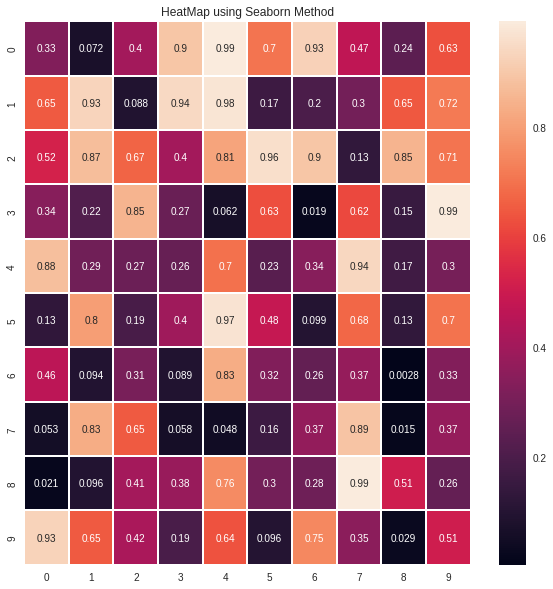

In [ ]:

# 1. Import Modules
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("seaborn")
 
# 2. Generate a 10x10 random integer matrix
data = np.random.rand(10,10)
print("Our dataset is : ",data)
 
# 3. Plot the heatmap
plt.figure(figsize=(10,10))
heat_map = sns.heatmap( data, linewidth = 1 , annot = True)
plt.title( "HeatMap using Seaborn Method" )
plt.show()

# Random Walks

In [ ]:
class Location(object):
    def __init__(self, x, y):
        """x and y are numbers"""
        self.x = x
        self.y = y

    def move(self, deltaX, deltaY):
        """deltaX and deltaY are numbers"""
        return Location(self.x + deltaX, self.y + deltaY)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def distFrom(self, other):
        xDist = self.x - other.getX()
        yDist = self.y - other.getY()
        return (xDist**2 + yDist**2)**0.5

    def __str__(self):
      return f"< {str(self.x)}, {str(self.y)} >"

  
x = Location(1, 2)
print(x)

< 1, 2 >


In [ ]:
class Drunk(object):
    def __init__(self, name = None):
        """Assumes name is a str"""
        self.name = name

    def __str__(self):
        if self != None:
            return self.name
        return 'Anon'




In [ ]:
import random

class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0,1), (0,-1), (1, 0), (-1, 0)]
        return random.choice(stepChoices)

class MasochistDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0,1.1), (0.0,-0.9),
                       (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

In [ ]:
class Field(object):
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        #use move method of Location to get new location
        self.drunks[drunk] =\
            self.drunks[drunk].move(xDist, yDist)
        
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

In [ ]:
def walk(f, d, numSteps):
    """Assumes: f a Field, d a Drunk in f, and numSteps an int >= 0.
       Moves d numSteps times, and returns the distance between
       the final location and the location at the start of the 
       walk."""
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

In [ ]:
def simWalks(numSteps, numTrials, dClass):
    """Assumes numSteps an int >= 0, numTrials an int > 0,
         dClass a subclass of Drunk
       Simulates numTrials walks of numSteps steps each.
       Returns a list of the final distances for each trial"""
    Homer = dClass('Homer')
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer,
                                    numSteps), 1))
    return distances

In [ ]:
def drunkTest(walkLengths, numTrials, dClass):
    """Assumes walkLengths a sequence of ints >= 0
         numTrials an int > 0, dClass a subclass of Drunk
       For each number of steps in walkLengths, runs simWalks with
         numTrials walks and prints results"""
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of', numSteps, 'steps')
        print(' Mean =', round(sum(distances)/len(distances), 4))
        print(' Max =', max(distances), 'Min =', min(distances))

In [ ]:
random.seed(0)
drunkTest((10, 100, 1000, 10000), 100, UsualDrunk)

UsualDrunk random walk of 10 steps
 Mean = 2.863
 Max = 7.2 Min = 0.0
UsualDrunk random walk of 100 steps
 Mean = 8.296
 Max = 21.6 Min = 1.4
UsualDrunk random walk of 1000 steps
 Mean = 27.297
 Max = 66.3 Min = 4.2
UsualDrunk random walk of 10000 steps
 Mean = 89.241
 Max = 226.5 Min = 10.0


In [ ]:
drunkTest((10, 100, 1000, 10000), 100, MasochistDrunk)

MasochistDrunk random walk of 10 steps
 Mean = 2.734
 Max = 6.6 Min = 0.2
MasochistDrunk random walk of 100 steps
 Mean = 10.314
 Max = 23.1 Min = 1.0
MasochistDrunk random walk of 1000 steps
 Mean = 56.827
 Max = 133.3 Min = 8.3
MasochistDrunk random walk of 10000 steps
 Mean = 512.961
 Max = 664.9 Min = 360.5


In [ ]:
drunkTest((0, 1, 2), 100, UsualDrunk)

UsualDrunk random walk of 0 steps
 Mean = 0.0
 Max = 0.0 Min = 0.0
UsualDrunk random walk of 1 steps
 Mean = 1.0
 Max = 1.0 Min = 1.0
UsualDrunk random walk of 2 steps
 Mean = 1.298
 Max = 2.0 Min = 0.0


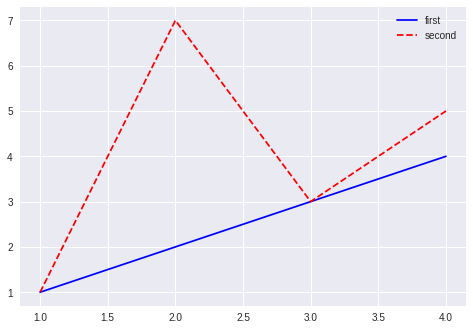

In [ ]:
import pylab
xVals = [1, 2, 3, 4]
yVals1 = [1, 2, 3, 4]
pylab.plot(xVals, yVals1, 'b-', label = 'first')
yVals2 = [1, 7, 3, 5]
pylab.plot(xVals, yVals2, 'r--', label = 'second')
pylab.legend()


Starting simulation of UsualDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps
Starting simulation of MasochistDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps


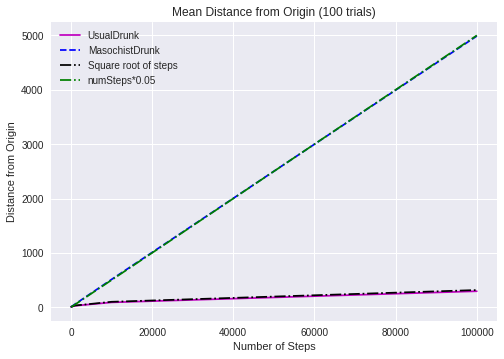

In [ ]:
class styleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles

    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result
    
def simDrunk(numTrials, dClass, walkLengths):
    meanDistances = []
    for numSteps in walkLengths:
        print('Starting simulation of',
              numSteps, 'steps')
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials)/len(trials)
        meanDistances.append(mean)
    return meanDistances

def simAll(drunkKinds, walkLengths, numTrials):
    styleChoice = styleIterator(('m-', 'b--', 'g-.'))
    for dClass in drunkKinds:
        curStyle = styleChoice.nextStyle()
        print('Starting simulation of', dClass.__name__)
        means = simDrunk(numTrials, dClass, walkLengths)
        pylab.plot(walkLengths, means, curStyle,
                   label = dClass.__name__)
    pylab.title('Mean Distance from Origin ('
                + str(numTrials) + ' trials)')
    pylab.xlabel('Number of Steps')
    pylab.ylabel('Distance from Origin')
    pylab.legend(loc = 'best')

random.seed(0)
numSteps = (10,100,1000,10000,100000)
simAll((UsualDrunk, MasochistDrunk), numSteps, 100)

pylab.plot(numSteps, pylab.array(numSteps)**0.5, 'k-.',
          label = 'Square root of steps')
pylab.plot(numSteps, pylab.array(numSteps)*0.05, 'g-.',
          label = 'numSteps*0.05')
pylab.legend(loc = 'best')

def getFinalLocs(numSteps, numTrials, dClass):
    locs = []
    d = dClass()
    for t in range(numTrials):
        f = OddField()
        f.addDrunk(d, Location(0, 0))
        for s in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

def plotLocs(drunkKinds, numSteps, numTrials):
    styleChoice = styleIterator(('k+', 'r^', 'mo'))
    for dClass in drunkKinds:
        locs = getFinalLocs(numSteps, numTrials, dClass)
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        xVals = pylab.array(xVals)
        yVals = pylab.array(yVals)
        meanX = sum(abs(xVals))/len(xVals)
        meanY = sum(abs(yVals))/len(yVals)
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle,
                      label = dClass.__name__ +\
                      ' mean abs dist = <'
                      + str(meanX) + ', ' + str(meanY) + '>')
    pylab.title('Location at End of Walks ('
                + str(numSteps) + ' steps)')
    pylab.ylim(-1000, 1000)
    pylab.xlim(-1000, 1000)
    pylab.xlabel('Steps East/West of Origin')
    pylab.ylabel('Steps North/South of Origin')
    pylab.legend(loc = 'lower center')

# random.seed(0)
#plotLocs((UsualDrunk, MasochistDrunk), 10000, 1000)

class OddField(Field):
    def __init__(self, numHoles = 1000,
                 xRange = 100, yRange = 100):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX, newY)
            self.wormholes[(x, y)] = newLoc

    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        if (x, y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x, y)]
            
#TraceWalk using oddField          
def traceWalk(fieldKinds, numSteps):
    styleChoice = styleIterator(('b+', 'r^', 'ko'))
    for fClass in fieldKinds:
        d = UsualDrunk()
        f = fClass()
        f.addDrunk(d, Location(0, 0))
        locs = []
        for s in range(numSteps):
            f.moveDrunk(d)
            locs.append(f.getLoc(d))
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle,
                   label = fClass.__name__)
    pylab.title('Spots Visited on Walk ('
                + str(numSteps) + ' steps)')
    pylab.xlabel('Steps East/West of Origin')
    pylab.ylabel('Steps North/South of Origin')
    pylab.legend(loc = 'best')

#random.seed(0)
#traceWalk((Field, OddField), 500)

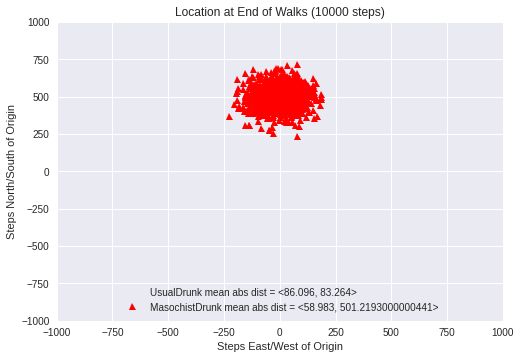

In [ ]:
plotLocs((UsualDrunk, MasochistDrunk), 10000, 1000)

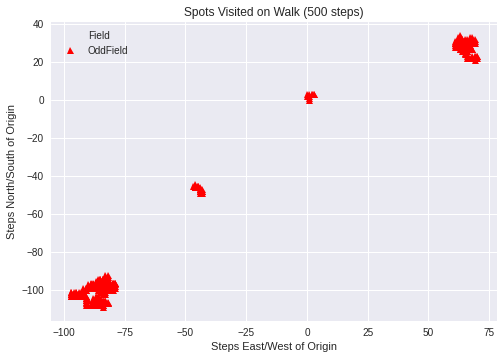

In [ ]:
traceWalk((Field, OddField), 500)

# Monte Carlo Simulation

In [ ]:
import random
class FairRoulette():
  def __init__(self):
    self.pockets = []
    for i in range(1, 37):
      self.pockets.append(i)
    self.ball = None
    self.pocketOdds = len(self.pockets) - 1
  def spin(self):
    self.ball = random.choice(self.pockets)
  def betPocket(self, pocket, amt):
    if str(pocket) == str(self.ball):
      return amt*self.pocketOdds
    else: return -amt
  def __str__(self):
    return 'Fair Roulette'


In [ ]:
def playRoulette(game, numSpins, pocket, bet, toPrint):
  totPocket = 0
  for i in range(numSpins):
    game.spin()
    totPocket += game.betPocket(pocket, bet)
  if toPrint:
    print(numSpins, 'spins of', game)
    print(f"Expected return betting {pocket} = {str(100*totPocket/numSpins)}%")
  return (totPocket/numSpins)

In [ ]:
random.seed(0)
game = FairRoulette()
for numSpins in (100, 1000000):
  for i in range(3):
    playRoulette(game, numSpins, 2, 1, True)

100 spins of Fair Roulette
Expected return betting 2 = -100.0%
100 spins of Fair Roulette
Expected return betting 2 = 44.0%
100 spins of Fair Roulette
Expected return betting 2 = -28.0%
1000000 spins of Fair Roulette
Expected return betting 2 = -0.046%
1000000 spins of Fair Roulette
Expected return betting 2 = 0.602%
1000000 spins of Fair Roulette
Expected return betting 2 = 0.7964%


In [ ]:
class EuRoulette(FairRoulette):
  def __init__(self):
    FairRoulette.__init__(self)
    self.pockets.append('0')
  def __str__(self):
    return 'European Roulette'

In [ ]:
class AmRoulette(EuRoulette):
  def __init__(self):
    EuRoulette.__init__(self)
    self.pockets.append('00')
  def __str__(self):
    return 'American Roulette'

In [ ]:
eu_game = EuRoulette()
na_game = AmRoulette()

for numSpins in (100, 1000000):
  for i in range(3):
    playRoulette(eu_game, numSpins, 2, 1, True)
    playRoulette(na_game, numSpins, 2, 1, True)


100 spins of European Roulette
Expected return betting 2 = -100.0%
100 spins of American Roulette
Expected return betting 2 = 8.0%
100 spins of European Roulette
Expected return betting 2 = 8.0%
100 spins of American Roulette
Expected return betting 2 = 44.0%
100 spins of European Roulette
Expected return betting 2 = -64.0%
100 spins of American Roulette
Expected return betting 2 = 44.0%
1000000 spins of European Roulette
Expected return betting 2 = -3.1672%
1000000 spins of American Roulette
Expected return betting 2 = -4.7476%
1000000 spins of European Roulette
Expected return betting 2 = -2.4724%
1000000 spins of American Roulette
Expected return betting 2 = -5.266%
1000000 spins of European Roulette
Expected return betting 2 = -2.6092%
1000000 spins of American Roulette
Expected return betting 2 = -4.5964%


In [ ]:
def getMeanandStd(X):
  mean = sum(X)/float(len(X))
  tot = 0.0
  for x in X:
    tot += (x - mean)**2
  std = (tot/len(X))**0.5
  return mean, std

# Confidence Intervals



Fraction within ~200 of mean = 0.9532139999999951


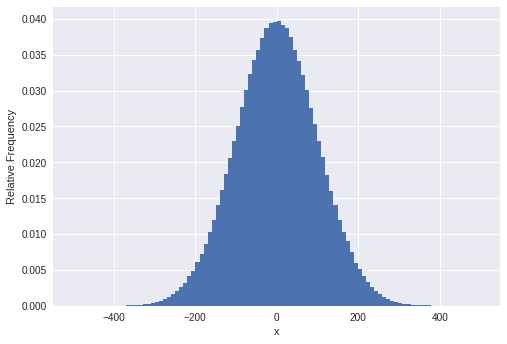

In [ ]:
import random
import math
import pylab

dist, numSamples = [], 1000000

for i in range(numSamples):
  dist.append(random.gauss(0, 100))

weights = [1/numSamples]*len(dist)
v = pylab.hist(dist, bins = 100, weights = [1/numSamples]*len(dist))
pylab.xlabel('x')
pylab.ylabel('Relative Frequency')

print('Fraction within ~200 of mean =', sum(v[0][30:70]))

Text(0.5, 1.0, 'Normal Distribution, mu = 0, sigma = 1')

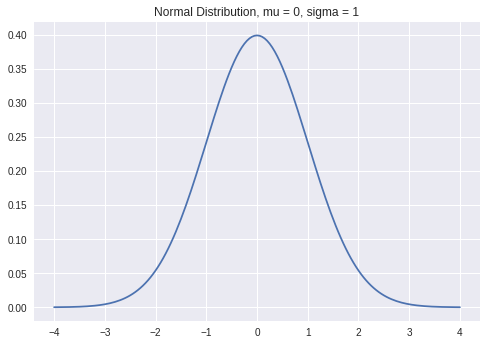

In [ ]:
def gaussian(x, mu, sigma):
  factor1 = (1.0/(sigma*((2*pylab.pi)**0.5)))
  factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
  return factor1*factor2

xVals, yVals = [], []
mu, sigma = 0, 1
x = -4
while x <= 4:
  xVals.append(x)
  yVals.append(gaussian(x, mu, sigma))
  x += 0.05
pylab.plot(xVals, yVals)
pylab.title('Normal Distribution, mu = ' + str(mu) + ', sigma = ' + str(sigma))


In [ ]:
import scipy.integrate

def checkEmpirical(numTrials):
  for t in range(numTrials):
    mu = random.randint(-10, 10)
    sigma = random.randint(1, 10)
    print('For mu = ', mu, 'and sigma = ', sigma)

    for numStd in (1, 1.96, 3):
      area = scipy.integrate.quad(gaussian, mu-numStd*sigma, mu+numStd*sigma, (mu, sigma))[0]
      print(' Fraction within', numStd, 'std = ', round(area, 4))
checkEmpirical(3)

For mu =  -8 and sigma =  5
 Fraction within 1 std =  0.6827
 Fraction within 1.96 std =  0.95
 Fraction within 3 std =  0.9973
For mu =  -7 and sigma =  3
 Fraction within 1 std =  0.6827
 Fraction within 1.96 std =  0.95
 Fraction within 3 std =  0.9973
For mu =  -2 and sigma =  7
 Fraction within 1 std =  0.6827
 Fraction within 1.96 std =  0.95
 Fraction within 3 std =  0.9973


In [ ]:
def plotMeans(numDice, numRolls, numBins, legend, color, style):
  means = []
  for i in range(numRolls//numDice):
    vals = 0
    for j in range(numDice):
      vals += 5*random.random()
    means.append(vals/float(numDice))
  pylab.hist(means, numBins, color = color, label = legend, weights = pylab.array(len(means)*[1])/len(means), hatch = style)
  return getMeanAndStd(means)

def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

Mean of rolling 1 die = 2.500165549838943, Std = 1.4436582196940642
Mean of rolling 50 dice = 2.4983221701406677, Std = 0.20341008578425315


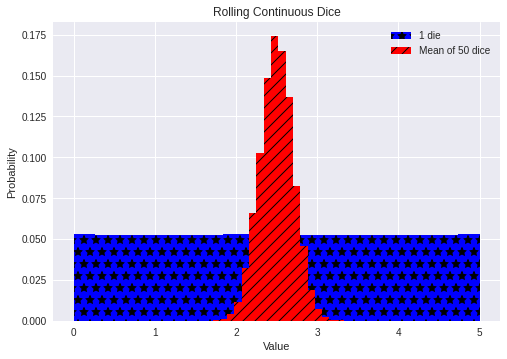

In [ ]:
mean, std = plotMeans(1, 1000000, 19, '1 die', 'b', '*')
print('Mean of rolling 1 die =', str(mean) + ',', 'Std =', std)
mean, std = plotMeans(50, 1000000, 19, 'Mean of 50 dice', 'r', '//')
print('Mean of rolling 50 dice =', str(mean) + ',', 'Std =', std)
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend()

Text(0.5, 1.0, 'Expected Return Betting a Pocket 200 Times')

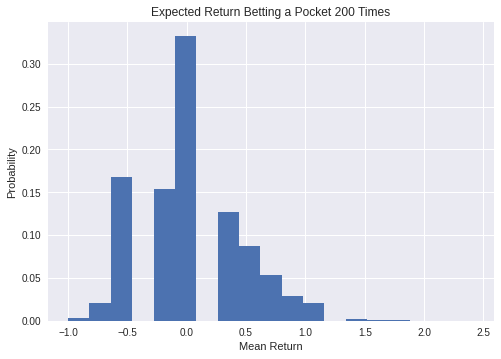

In [ ]:
numTrials = 1000000
numSpins = 200
game = FairRoulette()

def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, 2, 1, toPrint)
        pocketReturns.append(trialVals)
    return pocketReturns

means = []
for i in range(numTrials):
  means.append(findPocketReturn(game, 1, numSpins, False)[0])

pylab.hist(means, bins = 19, weights = [1/len(means)]*len(means))
pylab.xlabel('Mean Return')
pylab.ylabel('Probability')
pylab.title('Expected Return Betting a Pocket 200 Times')

In [ ]:
import numpy
def throwNeedles(numNeedles):
    inCircle = 0
    for Needles in range(1, numNeedles + 1, 1):
        x = random.random()
        y = random.random()
        if (x*x + y*y)**0.5 <= 1.0:
            inCircle += 1
    return (inCircle/float(numNeedles))*4
    
def getEst(numNeedles, numTrials):
    estimates = []
    for t in range(numTrials):
        piGuess = throwNeedles(numNeedles)
        estimates.append(piGuess)
    sDev = numpy.std(estimates)
    curEst = sum(estimates)/len(estimates)
    print('Est. = ' + str(curEst) +\
          ', Std. dev. = ' + str(round(sDev, 6))\
          + ', Needles = ' + str(numNeedles))
    return (curEst, sDev)

def estPi(precision, numTrials):
    numNeedles = 1000
    sDev = precision
    while sDev >= precision/2:
        curEst, sDev = getEst(numNeedles,
                              numTrials)
        numNeedles *= 2
    return curEst

random.seed(0)
estPi(0.005, 100)

Est. = 3.1484400000000012, Std. dev. = 0.047886, Needles = 1000
Est. = 3.1391799999999987, Std. dev. = 0.035495, Needles = 2000
Est. = 3.1410799999999997, Std. dev. = 0.02713, Needles = 4000
Est. = 3.141435, Std. dev. = 0.016805, Needles = 8000
Est. = 3.141355, Std. dev. = 0.0137, Needles = 16000
Est. = 3.1413137500000006, Std. dev. = 0.008476, Needles = 32000
Est. = 3.141171874999999, Std. dev. = 0.007028, Needles = 64000
Est. = 3.1415896874999993, Std. dev. = 0.004035, Needles = 128000
Est. = 3.1417414062499995, Std. dev. = 0.003536, Needles = 256000
Est. = 3.14155671875, Std. dev. = 0.002101, Needles = 512000


3.14155671875

# Experimental Data


a = 0.046432033192052496 b = 0.06562859649122817


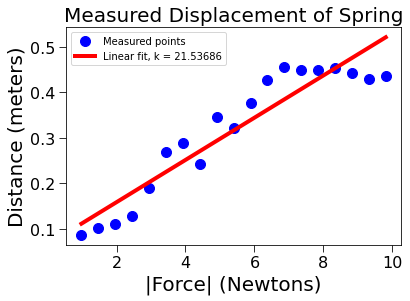

In [5]:
import random, pylab, numpy

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline() #discard header
    for line in dataFile:
        d, m = line.split()
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)
    
def labelPlot():
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')

def plotData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  #acc. due to gravity
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured displacements')
    labelPlot()
    
def fitData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81 #get force
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured points')
    labelPlot()                 
    a,b = pylab.polyfit(xVals, yVals, 1)
    estYVals = a*pylab.array(xVals) + b
    print('a =', a, 'b =', b)
    pylab.plot(xVals, estYVals, 'r',
               label = 'Linear fit, k = '
               + str(round(1/a, 5)))
    pylab.legend(loc = 'best')
    
fitData('springData.txt')


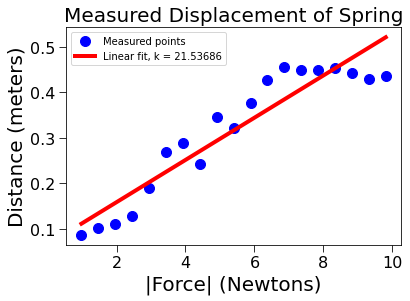

In [6]:
def fitData1(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81 #get force
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured points')
    labelPlot()                 
    model = pylab.polyfit(xVals, yVals, 1)
    estYVals = pylab.polyval(model, xVals)
    pylab.plot(xVals, estYVals, 'r',
               label = 'Linear fit, k = '
               + str(round(1/model[0], 5)))
    pylab.legend(loc = 'best')

fitData1('springData.txt')

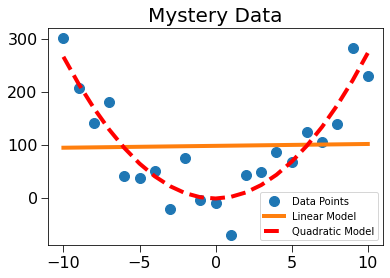

In [10]:
#Demonstration using mystery data

xVals, yVals = getData('mysteryData.txt')
pylab.plot(xVals, yVals, 'o', label = 'Data Points')
pylab.title('Mystery Data')

#Try linear model
model1 = pylab.polyfit(xVals, yVals, 1)
pylab.plot(xVals, pylab.polyval(model1, xVals),
          label = 'Linear Model')

#Try a quadratic model
model2 = pylab.polyfit(xVals, yVals, 2)
pylab.plot(xVals, pylab.polyval(model2, xVals),
          'r--', label = 'Quadratic Model')
pylab.legend()

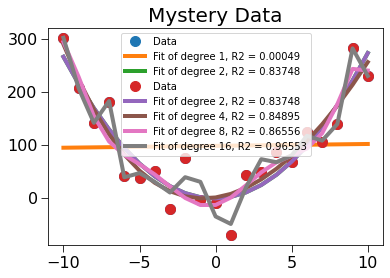

In [11]:
##Compare models
def aveMeanSquareError(data, predicted):
    error = 0.0
    for i in range(len(data)):
        error += (data[i] - predicted[i])**2
    return error/len(data)

#code to compare fits for mystery data
#estYVals = pylab.polyval(model1, xVals)  
#print('Ave. mean square error for linear model =',
#      aveMeanSquareError(yVals, estYVals))
#estYVals = pylab.polyval(model2, xVals)
#print('Ave. mean square error for quadratic model =',
#      aveMeanSquareError(yVals, estYVals))

def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 - (meanError/numpy.var(observed))

def genFits(xVals, yVals, degrees):
    models = []
    for d in degrees:
        model = pylab.polyfit(xVals, yVals, d)
        models.append(model)
    return models

def testFits(models, degrees, xVals, yVals, title):
    pylab.plot(xVals, yVals, 'o', label = 'Data')
    for i in range(len(models)):
        estYVals = pylab.polyval(models[i], xVals)
        error = rSquared(yVals, estYVals)
        pylab.plot(xVals, estYVals,
                   label = 'Fit of degree '\
                   + str(degrees[i])\
                   + ', R2 = ' + str(round(error, 5)))
    pylab.legend(loc = 'best')
    pylab.title(title)

#code for testing goodness of fit to parabolic data

xVals, yVals = getData('mysteryData.txt')
degrees = (1, 2)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')

#Compare higher-order fits
degrees = (2, 4, 8, 16)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')

def genNoisyParabolicData(a, b, c, xVals, fName):
    yVals = []
    for x in xVals:
        theoreticalVal = a*x**2 + b*x + c
        yVals.append(theoreticalVal\
        + random.gauss(0, 35))
    f = open(fName,'w')
    f.write('x        y\n')
    for i in range(len(yVals)):
        f.write(str(yVals[i]) + ' ' + str(xVals[i]) + '\n')
    f.close()
    
